<div style="padding:25px;color:white;margin:20;font-size:100%;text-align:center;display:fill;border-radius:10px;overflow:hidden;">
    <b>
        <span style='color:Black; font-size:45px;'>
        <u>IRIS FLOWER CLASSIFICATION</u>
    </span>
    </b>
</div>

![](https://img.freepik.com/premium-photo/field-iris-pallida-generative-ai_927367-3156.jpg?w=1000)


<div style="text-align:center;margin:40px;" >
    <span style="border:3px solid black; padding:10px;color:white;margin:10px;font-size:100%;display:fill;border-radius:30px;overflow:hidden; color:purple;font-weight:bold; font-size:40px;">About</span>
</div>


<div style="margin:1px;" >
    <p style="font-weight:bold; font-size:18px;">
The iris flower, belonging to the genus Iris, is a captivating and diverse plant species renowned for its vibrant colors and intricate petals. There are three primary types of iris flowers: Iris setosa, Iris virginica, and Iris versicolor. Each type exhibits distinct characteristics that make them easily distinguishable.</p>
<ul style="font-weight:bold; font-size:18px;">
    
<li>Iris setosa, often found in colder regions, is recognized for its diminutive size and delicate appearance. With petals showcasing a range of shades, from white to deep purples, it thrives in wet environments.</li>

<li>Iris virginica, commonly located in wetlands and along water bodies, boasts larger blossoms and bold hues. Its petals exhibit a captivating blend of blue, violet, and white, creating a striking visual appeal.</li>

<li>Iris versicolor, as its name suggests, presents a diverse palette of colors including blues, purples, and sometimes pinks. Thriving in moist environments, it adds a touch of elegance to its surroundings.</li>
</ul>
</div>        
<div >
    <img src= "https://miro.medium.com/v2/resize:fit:1400/1*f6KbPXwksAliMIsibFyGJw.png">
</div>

<p style="font-weight:bold; font-size:25px;">
The dataset contains a set of 150 records under 5 attributes - Petal Length, Petal Width, Sepal Length, Sepal width(All in cms) and Species(Class).
</p>

<div style="margin:40px;text-align:left;" >
    <span style="display:fill;overflow:hidden; color:purple;font-weight:bold; font-size:50px;"><u>Objective</u> : <span style="display:fill;overflow:hidden; color:Red;font-size:25px;">To use machine learning (ML) to build a predictive model that can identify the species of iris flower based on measurements of the sepal and petal.</span></span>
</div>


 <div style="text-align:center;margin:40px;" >
    <span style="border:3px solid black; padding:10px;color:white;margin:10px;font-size:100%;display:fill;border-radius:30px;overflow:hidden; color:blue;font-weight:bold; font-size:40px;"> STEP-1 : Importing Libraries</span>
</div>

In [166]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

 <div style="text-align:center;margin:40px;" >
    <span style="border:3px solid black; padding:10px;color:white;margin:10px;font-size:100%;display:fill;border-radius:30px;overflow:hidden; color:blue;font-weight:bold; font-size:40px;"> STEP-2 : Reading Dataset</span>
</div>

In [167]:
df = pd.read_csv('IRIS.csv')

 <div style="text-align:center;margin:40px;" >
    <span style="border:3px solid black; padding:10px;color:white;margin:10px;font-size:100%;display:fill;border-radius:30px;overflow:hidden; color:blue;font-weight:bold; font-size:40px;"> STEP-3 : Exploratory Data Analysis(EDA)</span>
</div>

In [168]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [169]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [171]:
df.shape

(150, 5)

In [172]:
df['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [173]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [174]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


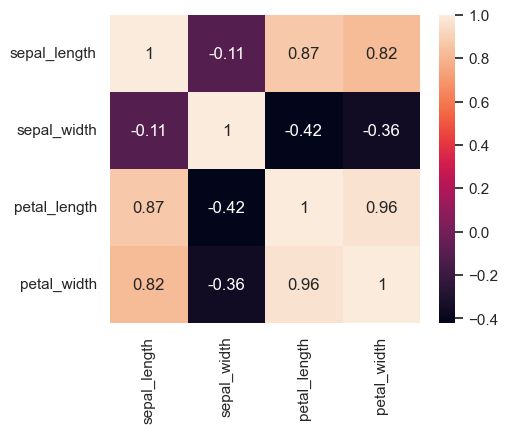

In [175]:
temp = df.drop(['species'], axis=1)

corr_matrix = temp.corr()

hm = sns.heatmap(data=corr_matrix,annot=True)

 <div style="text-align:center;margin:40px;" >
    <span style="border:3px solid black; padding:10px;color:white;margin:10px;font-size:100%;display:fill;border-radius:30px;overflow:hidden; color:blue;font-weight:bold; font-size:40px;"> STEP-4 : Data Visualization</span>
</div>

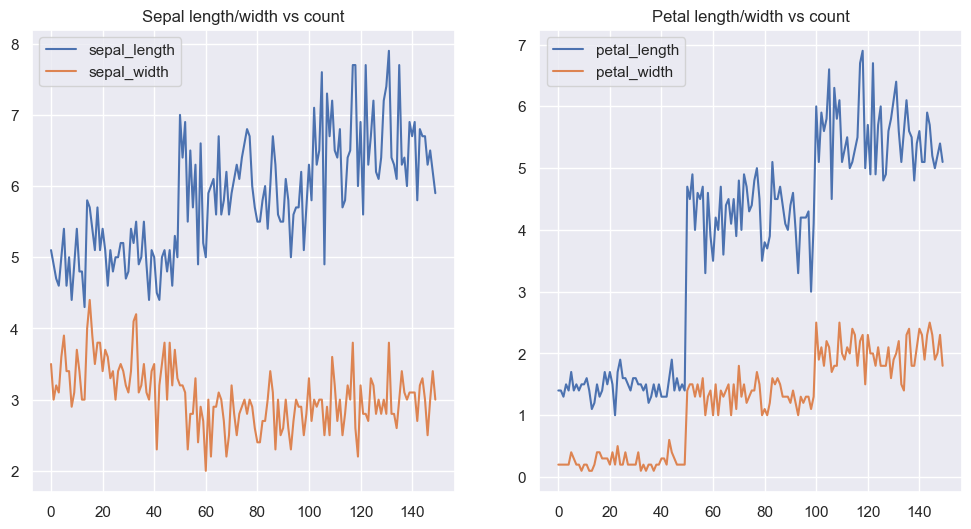

In [176]:
fig,ax = plt.subplots(1,2,figsize=(12,6))
ax[0].plot(df['sepal_length'])
ax[0].plot(df['sepal_width'])
ax[0].set_title('Sepal length/width vs count')
ax[0].legend(['sepal_length','sepal_width'])
ax[1].plot(df['petal_length'])
ax[1].plot(df['petal_width'])
ax[1].set_title('Petal length/width vs count')
ax[1].legend(['petal_length','petal_width'])
plt.show()

Text(0, 0.5, 'Length/Width')

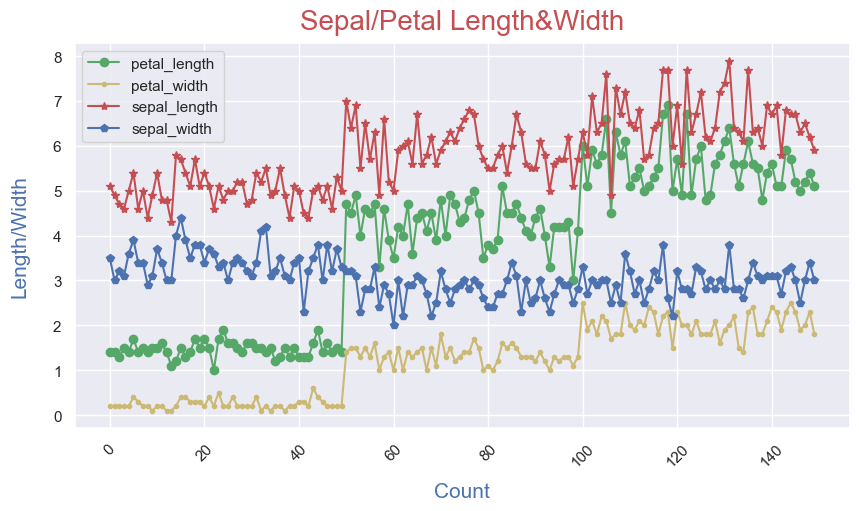

In [177]:
df['petal_length'].plot(kind='line',legend=True,marker='o',color='g',figsize=(10,5),grid=True,rot=45)
df['petal_width'].plot(kind='line',legend=True,marker=".",color='y',figsize=(10,5),grid=True,rot=45)
df['sepal_length'].plot(kind='line',legend=True,marker="*",color='r',figsize=(10,5),grid=True,rot=45)
df['sepal_width'].plot(kind='line',legend=True,marker="p",color='b',figsize=(10,5),grid=True,rot=45)
plt.title('Sepal/Petal Length&Width',pad=10,loc='center',fontdict={'fontsize': 20, 'color': 'r','verticalalignment': 'baseline',})
plt.xlabel('Count',labelpad=20,loc='center',fontdict={'fontsize': 15, 'color': 'b','verticalalignment': 'baseline',})
plt.ylabel('Length/Width',labelpad=20,loc='center',fontdict={'fontsize': 15, 'color': 'b','verticalalignment': 'baseline',})

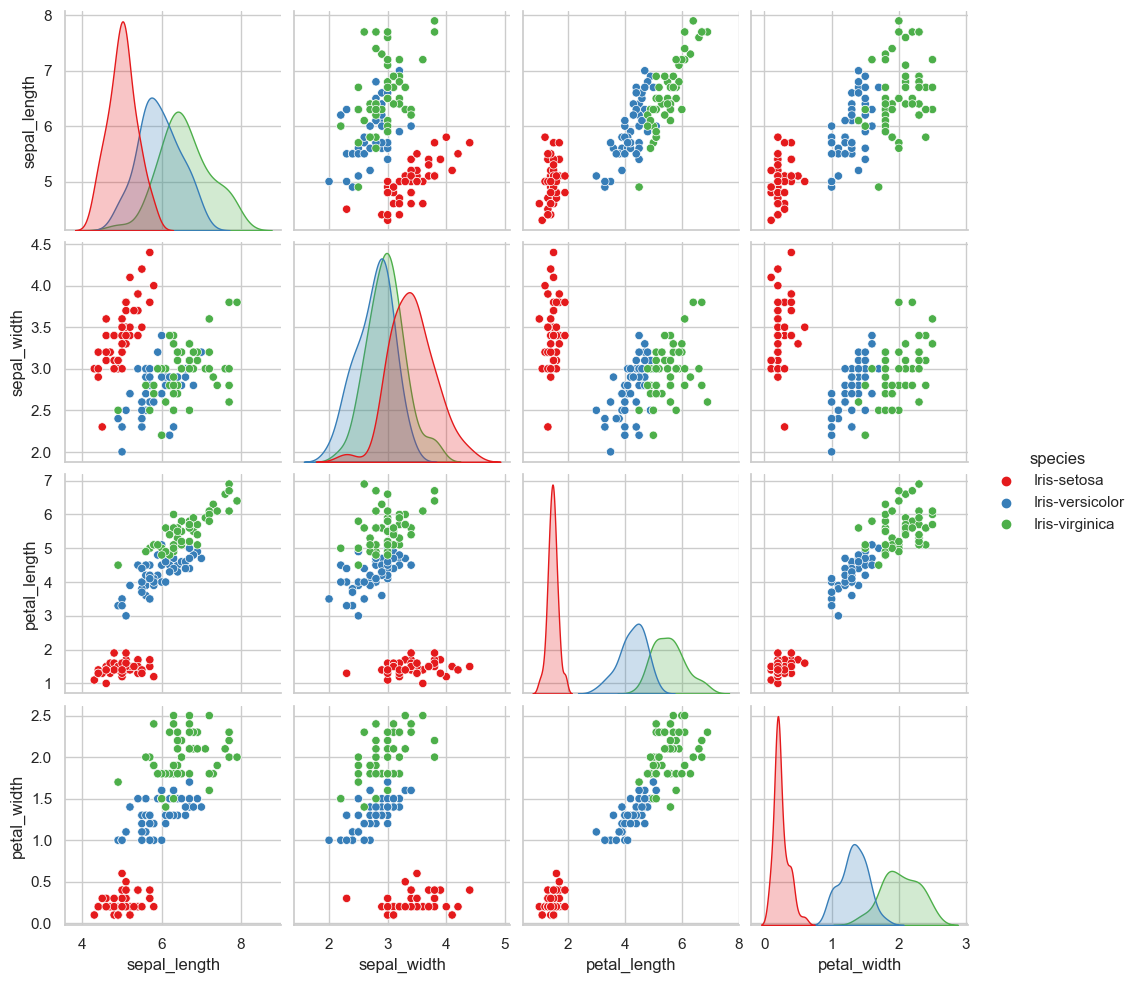

In [178]:
sns.set_style('whitegrid')
sns.pairplot(df, hue = 'species', palette="Set1")
plt.show()

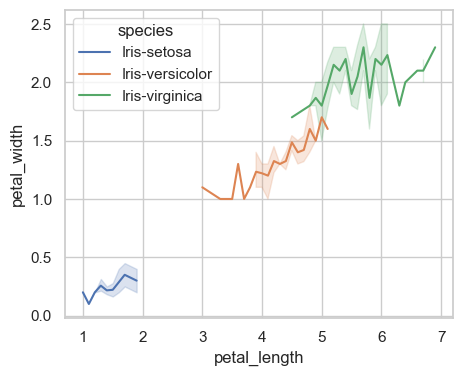

In [179]:
sns.lineplot(data=df, x="petal_length", y="petal_width", markers=True, hue="species")
plt.show()

Text(0, 0.5, 'Sepal Length')

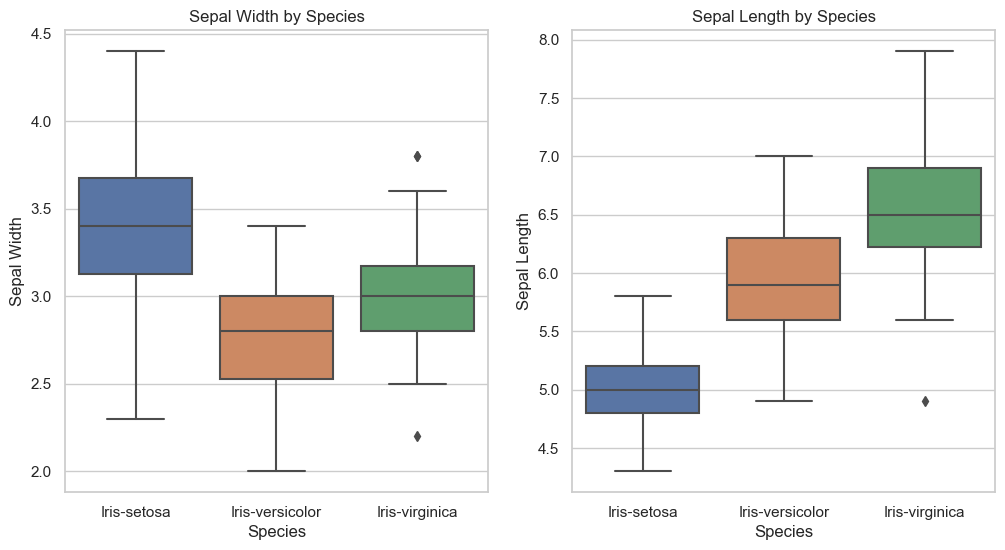

In [180]:
# Create subplots for sepal width and sepal length
fig, axes = plt.subplots(1,2,figsize=(12,6))

# Box plot for sepal width
sns.boxplot(data=df, x='species', y='sepal_width', ax=axes[0])
axes[0].set_title('Sepal Width by Species')
axes[0].set_xlabel('Species')
axes[0].set_ylabel('Sepal Width')

# Box plot for sepal length
sns.boxplot(data=df, x='species', y='sepal_length', ax=axes[1])
axes[1].set_title('Sepal Length by Species')
axes[1].set_xlabel('Species')
axes[1].set_ylabel('Sepal Length')



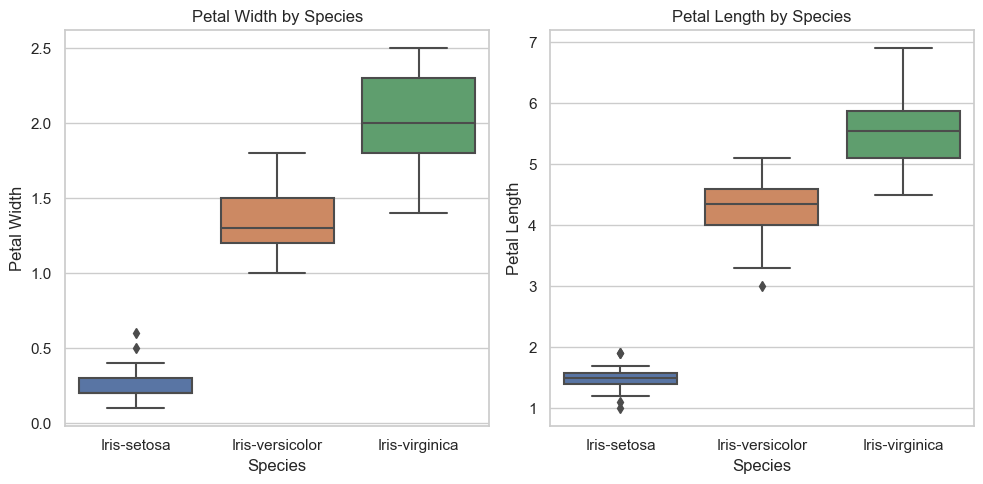

In [181]:
fig, axes = plt.subplots(1,2,figsize=(10,5))

sns.boxplot(data=df, x='species', y='petal_width', ax=axes[0])
axes[0].set_title('Petal Width by Species')
axes[0].set_xlabel('Species')
axes[0].set_ylabel('Petal Width')

# Box plot for sepal length
sns.boxplot(data=df, x='species', y='petal_length', ax=axes[1])
axes[1].set_title('Petal Length by Species')
axes[1].set_xlabel('Species')
axes[1].set_ylabel('Petal Length')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Mean Petal length of each species')

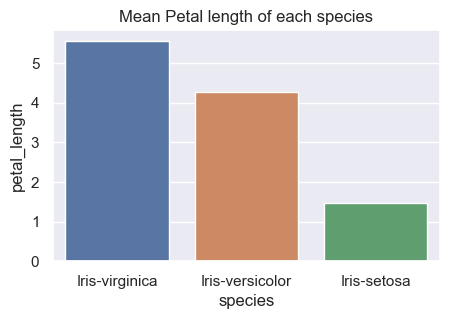

In [182]:
sns.set(rc={'figure.figsize':(5,3)})
mean = df.groupby(['species'], as_index=False)['petal_length'].mean().sort_values(by='petal_length', ascending=False)
sns.barplot(data = mean,x = 'species',y= 'petal_length')
plt.title('Mean Petal length of each species')

Text(0.5, 1.0, 'Mean Petal width of each species')

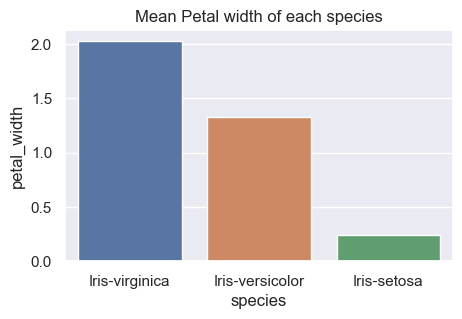

In [183]:
sns.set(rc={'figure.figsize':(5,3)})
mean = df.groupby(['species'], as_index=False)['petal_width'].mean().sort_values(by='petal_width', ascending=False)
sns.barplot(data = mean,x = 'species',y= 'petal_width')
plt.title('Mean Petal width of each species')

Text(0.5, 1.0, 'Mean Sepal length of each species')

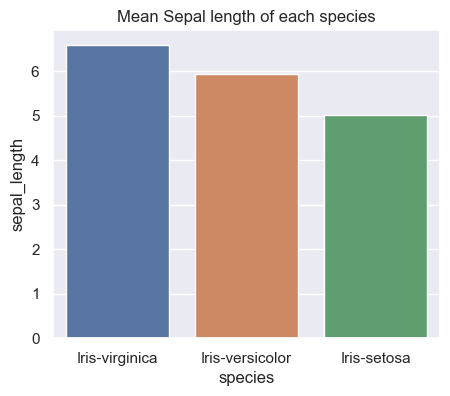

In [184]:
sns.set(rc={'figure.figsize':(5,4)})
mean = df.groupby(['species'], as_index=False)['sepal_length'].mean().sort_values(by='sepal_length', ascending=False)
sns.barplot(data = mean,x = 'species',y= 'sepal_length')
plt.title('Mean Sepal length of each species')

Text(0.5, 1.0, 'Mean Sepal width of each species')

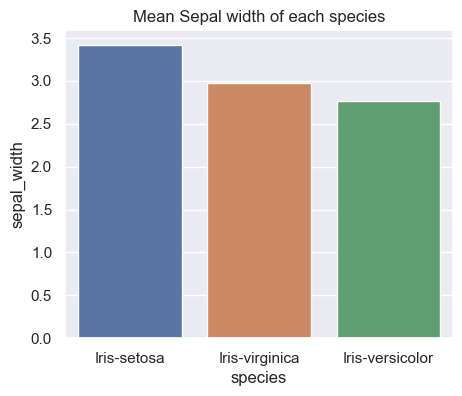

In [185]:
sns.set(rc={'figure.figsize':(5,4)})
mean = df.groupby(['species'], as_index=False)['sepal_width'].mean().sort_values(by='sepal_width', ascending=False)
sns.barplot(data = mean,x = 'species',y= 'sepal_width')
plt.title('Mean Sepal width of each species')

 <div style="text-align:center;margin:40px;" >
    <span style="border:3px solid black; padding:10px;color:white;margin:10px;font-size:100%;display:fill;border-radius:30px;overflow:hidden; color:blue;font-weight:bold; font-size:40px;"> STEP-5 : Splitting the data</span>
</div>


In [253]:
Train = df.drop('species', axis=1)
Test = df['species']
x_train, x_test, y_train, y_test = train_test_split(Train, Test, test_size = 0.2, random_state =1)

In [254]:
print("x_train : ", x_train.shape)
print("x_test : ", x_test.shape)
print("y_train : ", y_train.shape) 
print("y_test : ", y_test.shape) 

x_train :  (120, 4)
x_test :  (30, 4)
y_train :  (120,)
y_test :  (30,)


 <div style="text-align:center;margin:40px;" >
    <span style="border:3px solid black; padding:10px;color:white;margin:10px;font-size:100%;display:fill;border-radius:30px;overflow:hidden; color:blue;font-weight:bold; font-size:40px;"> STEP-6 : Model Building</span>
</div>

In [255]:
lor = LogisticRegression()
lor.fit(x_train,y_train)
y_pred = lor.predict(x_test)
cr= classification_report(y_test,y_pred)
print(cr)
Acc = accuracy_score(y_pred,y_test)
print('Logistic regression accuracy: {:.2f}%'.format(Acc*100))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

Logistic regression accuracy: 96.67%


In [256]:
svm = SVC()
svm.fit(x_train,y_train)
y_pred = svm.predict(x_test)
cr= classification_report(y_test,y_pred)
print(cr)
Acc = accuracy_score(y_pred,y_test)
print('Support vector Machine accuracy: {:.2f}%'.format(Acc*100))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

Support vector Machine accuracy: 96.67%


In [257]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
cr= classification_report(y_test,y_pred)
print(cr)
Acc = accuracy_score(y_pred,y_test)
print('K neighbours classifier accuracy: {:.2f}%'.format(Acc*100))


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

K neighbours classifier accuracy: 100.00%


<span style="display:fill;overflow:hidden; color:darkViolet;font-size:30px;font-weight:bold;">MODEL ACCURACY ACHIEVED: <span style="color:purple;font-size:30px;font-weight:bold">100 %</span></span>

 <div style="text-align:center;margin:40px;" >
    <span style="border:3px solid black; padding:10px;color:white;margin:10px;font-size:100%;display:fill;border-radius:30px;overflow:hidden; color:blue;font-weight:bold; font-size:40px;"> STEP-7 : Making Prediction using model</span>
</div>

In [258]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [259]:
prediction= knn.predict((np.array([[5,2.75,1.5,0.25]])))
print("Flower type prediction : ",prediction)

Flower type prediction :  ['Iris-setosa']


<div style="padding:15px;color:white;font-size:100%;text-align:center;display:fill;overflow:hidden;">
   <b> <span style='color:red; font-size:30px;'>Made by Sagar Thora</span></b>
</div>